# Sea Level Predictor

I analyze a dataset of the global average sea level change since 1880. I will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

The boilerplate also includes commands to save and return the image.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("epa-sea-level.csv")

In [5]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv("epa-sea-level.csv")

    # Create scatter plot
    x = df["Year"]
    y = df["CSIRO Adjusted Sea Level"]

    fig, ax = plt.subplots(figsize=(12,12))
    ax = plt.scatter(x, y)

    # Create first line of best fit
    res = linregress(x,y)
    print(res)
    x_forcast= pd.Series(([i for i in range(1850, 2051)]))
    y_forcast = res.slope*x_forcast + res.intercept
    plt.plot(x_forcast, y_forcast, 'r-')

    df_forc = df.loc[df["Year"] >= 2000]
    new_x = df_forc["Year"]
    new_y = df_forc["CSIRO Adjusted Sea Level"]

    # Create second line of best fit
    new_res = linregress(new_x, new_y)
    new_x_forcast= pd.Series(([i for i in range(2000, 2051)]))
    new_y_forcast = new_res.slope*new_x_forcast + new_res.intercept
    plt.plot(new_x_forcast, new_y_forcast, 'orange')

    #Add labels and title
    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()


LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)


<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

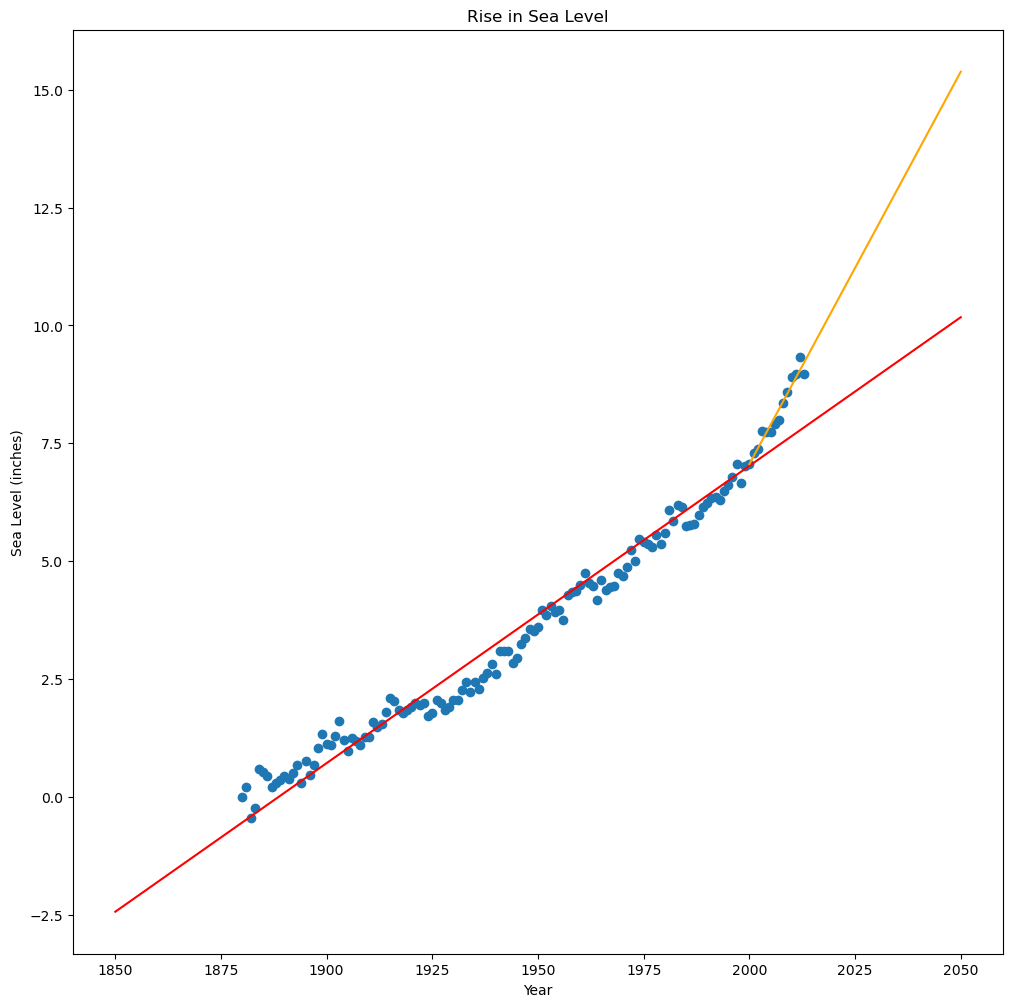

In [12]:
draw_plot()